In [1]:
from STMiner import SPFinder
sp = SPFinder()

In [ ]:
h5ad_file_path = "I://10X_Visium_hunter2021spatially_sample_C_data.h5ad"
sp.read_h5ad(file=h5ad_file_path, bin_size=1)

In [4]:
sp.get_genes_csr_array(min_cells=100, log1p=False, normalize=False)

Parsing distance array...: 100%|██████████| 8768/8768 [00:48<00:00, 181.37it/s]


In [5]:
sp.spatial_high_variable_genes()

Computing ot distances...: 100%|██████████| 8768/8768 [34:29<00:00,  4.24it/s]  


In [6]:
import pandas as pd
sp.global_distance.to_csv('svg_result.csv')

In [7]:
sp.fit_pattern(n_comp=10, gene_list=list(sp.global_distance[:2000]['Gene']),normalize=False)

Fitting GMM...: 100%|██████████| 2000/2000 [05:07<00:00,  6.51it/s]


In [9]:
sp.build_distance_array()
sp.cluster_gene(n_clusters=6, mds_components=20)

Building distance array...: 100%|██████████| 2000/2000 [12:34<00:00,  2.65it/s]


In [22]:
sp.get_pattern_array(vote_rate=0.2, mode='vote')

Accumulating gene expression...: 100%|██████████| 299/299 [00:01<00:00, 159.20it/s]


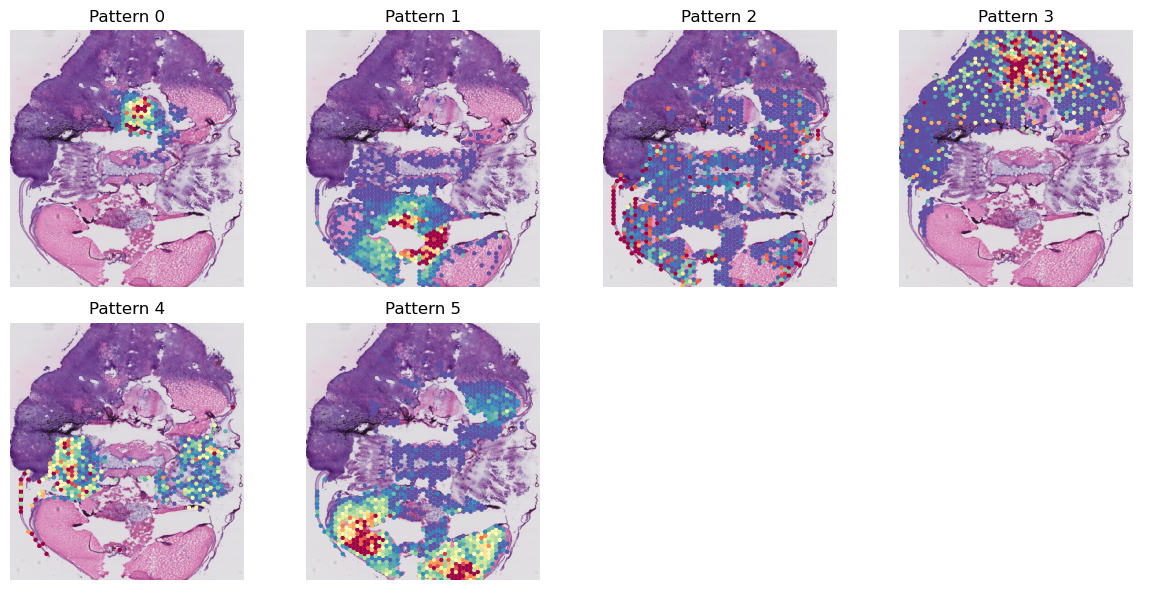

In [10]:
sp.plot.plot_pattern(
    heatmap=False,
    s=10,
    rotate=False,
    reverse_y=True,
    reverse_x=True,
    vmax=95,
    image_path="./demo_img.png",
    cmap="Spectral_r",
    aspect=.55,
)

In [3]:
interested_genes = ["mbpa", "BX957331.1", "madd"]
sp.get_pattern_of_given_genes(gene_list = interested_genes, n_comp=10)

Accumulating gene expression...:   0%|          | 0/3 [00:00<?, ?it/s]

Accumulating gene expression...: 100%|██████████| 3/3 [00:00<00:00, 124.95it/s]


In [4]:
from STMiner.Algorithm.distance import compare_gmm_distance
df = compare_gmm_distance(sp.custom_pattern, sp.patterns)

Comparing distance...: 100%|██████████| 2000/2000 [00:02<00:00, 994.56it/s] 


In [5]:
df.to_csv('compare_gmm_distance.csv')